In [1]:
import numpy as np
import imageio
import scipy as sio
import os
import pandas as pd
from scipy import ndimage

In [2]:
#%%
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_data, Y_label = loadlocal_mnist(
            images_path='MNIST/train-images-idx3-ubyte',
            labels_path='MNIST/train-labels-idx1-ubyte')

else:
    X_data, Y_label = loadlocal_mnist(
            images_path='MNIST/train-images.idx3-ubyte',
            labels_path='MNIST/train-labels.idx1-ubyte')

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

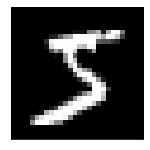

In [7]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(28,28))
X_data = X_data.astype('float32')
for i in range(2900):
    plt.subplot(2900,i+1)
    plt.imshow(X_data[i].reshape(28,28), cmap='gray', interpolation='nearest')
    print(X_data[i])
    plt.xticks([])
    plt.yticks([])
#%%

## Testing and Screenshots

In [8]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from skimage.transform import resize
from scipy.ndimage import zoom
from numpy import asarray

from skimage.filters import threshold_mean

X_data = X_data.astype('float32')

P_NAngle=4
Downsampling=28

df=pd.DataFrame([])

for i in range(60000):
    P_Angle=0
    RBC=np.array([])
    while P_Angle <180:
        data=np.array([])
        Th_P=radon(X_data[i].reshape(Downsampling,Downsampling),theta=[P_Angle])
    #Creating Threshold Values
        thresh = threshold_mean(Th_P)
        binary = Th_P >= thresh
        data = np.asarray(binary)
        RBC=np.append(RBC,data)
        P_Angle=P_Angle+(180/P_NAngle)
        RBC=np.expand_dims(RBC,axis=0)
    new_row={'Labels':Y_label[i],'Barcodes':RBC}
    #df=df.append(new_row,ignore_index=True)
    #plt.axis('off')
    #plt.imshow(RBC, cmap='gray',interpolation='nearest')
    #print(RBC)
    #plt.savefig('test1.jpg',bbox_inches='tight',pad_inches=0)
#df.to_excel('MNISTBarcodeDataset.xlsx',index=False)
print ("done")
#%%

done


## Final: MNIST Radon Barcode Generation Algorithm

In [54]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from skimage.transform import resize
from scipy.ndimage import zoom
from numpy import asarray

from skimage.filters import threshold_mean

X_data = X_data.astype('float32')

P_NAngle=4
Downsampling=28

Hamming=[]

for i in range(60000):
    P_Angle=0
    RBC=np.array([])
    while P_Angle <180:
        data=np.array([])
#Radon Projections
        Th_P=radon(X_data[i].reshape(Downsampling,Downsampling),theta=[P_Angle])
#Creating Threshold Values
        thresh = threshold_mean(Th_P)#Finds the threshold mean of the projection
        binary = Th_P >= thresh#Determines whether 1 or 0 based on relation to the threshold mean
        data = np.asarray(binary)
        RBC=np.append(RBC,data)#Adds to the full barcode, till all projections are binarized 
        P_Angle=P_Angle+(180/P_NAngle)#Changes the angle of radon projection
        RBC=np.expand_dims(RBC,axis=0)
    Hamming.append(RBC)
print ("Barcodes Generated")
print(Hamming[59999])
#%%

Barcodes Generated
[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Final: MNIST Radon Barcode Searching Algorithm

In [322]:
from scipy.spatial.distance import hamming
import random
import timeit

potential=1
value=0
potential_label=0
count=0
sum=0
for i in range(100):
    x=random.randint(1,60000)
    print('The testing label is: ',Y_label[x],' and the image number is: ',x)
    potential=1
    value=0
    potential_label=0
    sum=sum+1
    for j in range(60000):
        value=hamming(Hamming[x],Hamming[j])
        if (value<potential and x!=j):
            potential=value
            potential_label=j
            print('The potential label is: ', Y_label[j],' and the image number is: ',j)
    if (Y_label[potential_label]==Y_label[x]):
        count=count+1
        average=count/sum
print('done')
print(average*100,'%')

The testing label is:  7  and the image number is:  5416
The potential label is:  5  and the image number is:  0
The potential label is:  4  and the image number is:  2
The potential label is:  4  and the image number is:  26
The potential label is:  7  and the image number is:  42
The potential label is:  7  and the image number is:  52
The potential label is:  7  and the image number is:  196
The potential label is:  7  and the image number is:  3246
The testing label is:  8  and the image number is:  23004
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  1  and the image number is:  3
The potential label is:  1  and the image number is:  6
The potential label is:  0  and the image number is:  34
The potential label is:  0  and the image number is:  69
The potential label is:  0  and the image number is:  216
The potential label is:  0  and the image number is:  668
The potential label is:  0  and

The testing label is:  1  and the image number is:  37761
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  1  and the image number is:  3
The potential label is:  1  and the image number is:  59
The potential label is:  1  and the image number is:  12215
The potential label is:  1  and the image number is:  39281
The testing label is:  6  and the image number is:  33724
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  9  and the image number is:  4
The potential label is:  6  and the image number is:  13
The potential label is:  6  and the image number is:  66
The potential label is:  6  and the image number is:  73
The potential label is:  6  and the image number is:  22323
The testing label is:  4  and the image number is:  46976
The potential label is:  5  and the image number is:  0
The potential label is:  9

The testing label is:  2  and the image number is:  11319
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  7  and the image number is:  29
The potential label is:  6  and the image number is:  62
The potential label is:  2  and the image number is:  178
The potential label is:  2  and the image number is:  213
The potential label is:  2  and the image number is:  233
The potential label is:  2  and the image number is:  385
The potential label is:  2  and the image number is:  673
The potential label is:  2  and the image number is:  2409
The potential label is:  2  and the image number is:  12859
The potential label is:  2  and the image number is:  37491
The testing label is:  4  and the image number is:  31090
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  9  and the image number is:  4
The potential label i

The potential label is:  1  and the image number is:  59965
The testing label is:  9  and the image number is:  42124
The potential label is:  5  and the image number is:  0
The potential label is:  9  and the image number is:  4
The potential label is:  9  and the image number is:  45
The potential label is:  9  and the image number is:  116
The potential label is:  9  and the image number is:  162
The potential label is:  9  and the image number is:  428
The potential label is:  9  and the image number is:  26837
The testing label is:  6  and the image number is:  45478
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  6  and the image number is:  13
The potential label is:  6  and the image number is:  18
The potential label is:  6  and the image number is:  106
The potential label is:  6  and the image number is:  126
The potential label is:  6  and the image number is:  1184
The potential label 

The testing label is:  6  and the image number is:  51031
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  9  and the image number is:  4
The potential label is:  6  and the image number is:  13
The potential label is:  6  and the image number is:  221
The potential label is:  6  and the image number is:  1189
The potential label is:  6  and the image number is:  3993
The potential label is:  6  and the image number is:  32903
The testing label is:  3  and the image number is:  52810
The potential label is:  5  and the image number is:  0
The potential label is:  3  and the image number is:  7
The potential label is:  3  and the image number is:  27
The potential label is:  3  and the image number is:  49
The potential label is:  3  and the image number is:  50
The potential label is:  3  and the image number is:  1809
The potential label is:  3  and the image number is:  7397
The potential label is

The potential label is:  3  and the image number is:  21610
The testing label is:  2  and the image number is:  28685
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  9  and the image number is:  4
The potential label is:  2  and the image number is:  5
The potential label is:  1  and the image number is:  113
The potential label is:  2  and the image number is:  187
The potential label is:  2  and the image number is:  199
The potential label is:  2  and the image number is:  213
The potential label is:  2  and the image number is:  693
The potential label is:  2  and the image number is:  1299
The potential label is:  2  and the image number is:  5707
The potential label is:  2  and the image number is:  7653
The potential label is:  2  and the image number is:  10583
The testing label is:  1  and the image number is:  34158
The potential label is:  5  and the image number is:  0
The potential lab

The potential label is:  9  and the image number is:  18193
The testing label is:  9  and the image number is:  36993
The potential label is:  5  and the image number is:  0
The potential label is:  9  and the image number is:  4
The potential label is:  9  and the image number is:  19
The potential label is:  9  and the image number is:  45
The potential label is:  9  and the image number is:  57
The potential label is:  9  and the image number is:  3927
The potential label is:  9  and the image number is:  41875
The testing label is:  4  and the image number is:  44998
The potential label is:  5  and the image number is:  0
The potential label is:  0  and the image number is:  1
The potential label is:  4  and the image number is:  2
The potential label is:  4  and the image number is:  60
The potential label is:  4  and the image number is:  828
The potential label is:  4  and the image number is:  5064
The potential label is:  4  and the image number is:  12922
The testing label is